In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

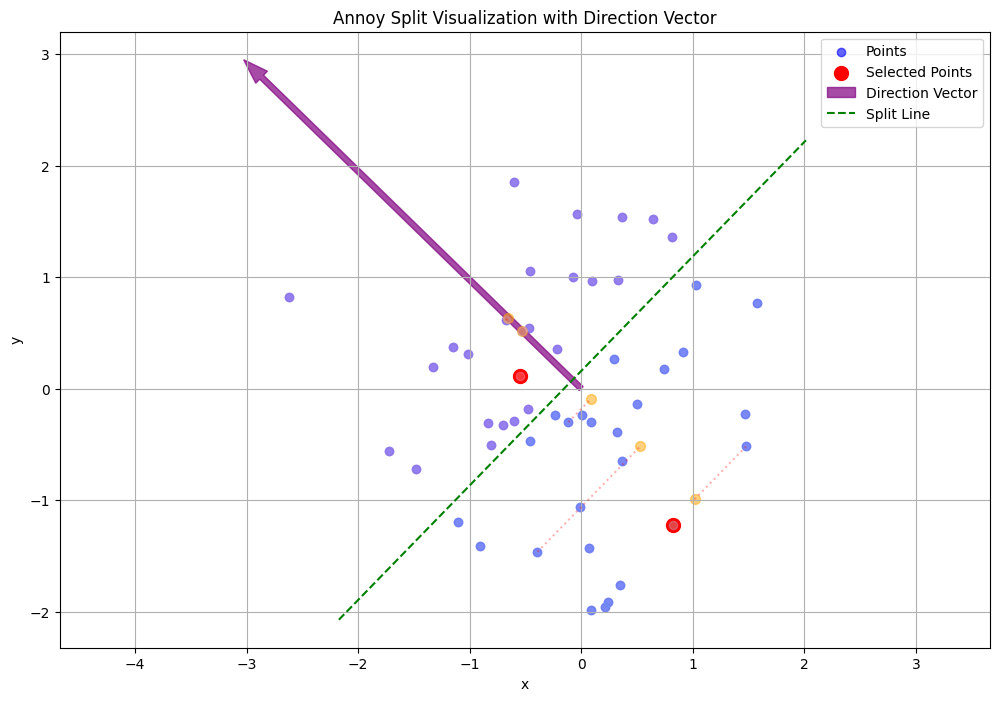

In [4]:
# Generate sample 2D points
np.random.seed(42)
points = np.random.randn(50, 2)

# Select two random points for direction
idx = np.random.choice(len(points), 2, replace=False)
p1, p2 = points[idx[0]], points[idx[1]]

# Create direction vector
direction = p2 - p1
direction = direction / np.linalg.norm(direction)

# Calculate projections
projections = points @ direction
threshold = np.median(projections)

# Plot
plt.figure(figsize=(12, 8))

# Plot original points
plt.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.6, label='Points')

# Plot the two selected points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], c='red', s=100, label='Selected Points')

# Draw direction vector
direction_scale = 4  # Scale factor to make direction vector visible
plt.arrow(0, 0, direction[0] * direction_scale, direction[1] * direction_scale, 
          color='purple', width=0.05, label='Direction Vector', alpha=0.7)

# Calculate and plot the splitting line
line_point = direction * threshold
perpendicular = np.array([-direction[1], direction[0]])
line_points = np.vstack([
    line_point + perpendicular * 3,
    line_point - perpendicular * 3
])
plt.plot(line_points[:, 0], line_points[:, 1], 'g--', label='Split Line')

# Plot projections for a few sample points
n_samples = 5
sample_idx = np.random.choice(len(points), n_samples, replace=False)
for idx in sample_idx:
    point = points[idx]
    proj_val = projections[idx]
    proj_point = direction * proj_val
    plt.plot([point[0], proj_point[0]], [point[1], proj_point[1]], 
             'r:', alpha=0.3)
    plt.scatter(proj_point[0], proj_point[1], c='orange', alpha=0.5, s=50)

# Color points based on which side they're on
left_mask = projections <= threshold
plt.scatter(points[left_mask, 0], points[left_mask, 1], c='lightblue', alpha=0.3)
plt.scatter(points[~left_mask, 0], points[~left_mask, 1], c='pink', alpha=0.3)

plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title('Annoy Split Visualization with Direction Vector')
plt.xlabel('x')
plt.ylabel('y')

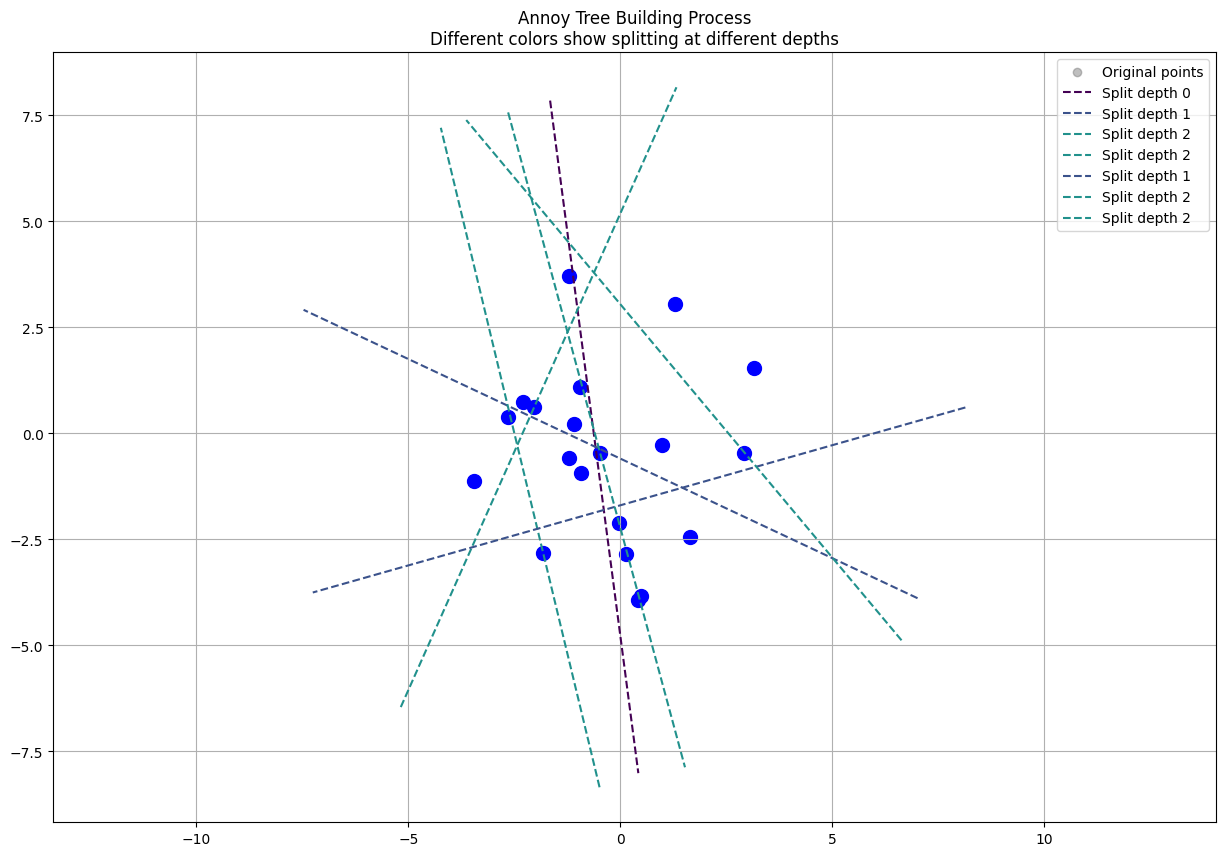

In [5]:
def visualize_tree_building(points, max_size=3):
    """Visualize the tree building process for 2D points"""
    plt.figure(figsize=(15, 10))
    
    def plot_split(points, depth=0, x_min=-4, x_max=4, y_min=-4, y_max=4):
        # Base case: if few enough points, this is a leaf node
        if len(points) <= max_size:
            plt.scatter(points[:, 0], points[:, 1], c='blue', s=100)
            return
            
        # Create splitting hyperplane
        idx = np.random.choice(len(points), 2, replace=False)
        p1, p2 = points[idx[0]], points[idx[1]]
        direction = p2 - p1
        direction = direction / np.linalg.norm(direction)
        
        # Calculate projections and threshold
        projections = points @ direction
        threshold = np.median(projections)
        
        # Split points
        left_mask = projections <= threshold
        left_points = points[left_mask]
        right_points = points[~left_mask]
        
        # Plot split line
        mid_point = direction * threshold
        perpendicular = np.array([-direction[1], direction[0]])
        line_points = np.vstack([
            mid_point + perpendicular * 8,
            mid_point - perpendicular * 8
        ])
        
        # Plot with different colors for depth
        color = plt.cm.viridis(depth / 4)
        plt.plot(line_points[:, 0], line_points[:, 1], '--', color=color, 
                label=f'Split depth {depth}')
        
        # Recursively split and plot children
        if len(left_points) > 0:
            plot_split(left_points, depth + 1)
        if len(right_points) > 0:
            plot_split(right_points, depth + 1)
    
    # Generate sample points
    np.random.seed(42)
    points = np.random.randn(20, 2) * 2
    
    # Plot original points
    plt.scatter(points[:, 0], points[:, 1], c='gray', alpha=0.5, label='Original points')
    
    # Build and plot tree
    plot_split(points)
    
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.title('Annoy Tree Building Process\nDifferent colors show splitting at different depths')

visualize_tree_building(np.random.randn(20, 2) * 2)

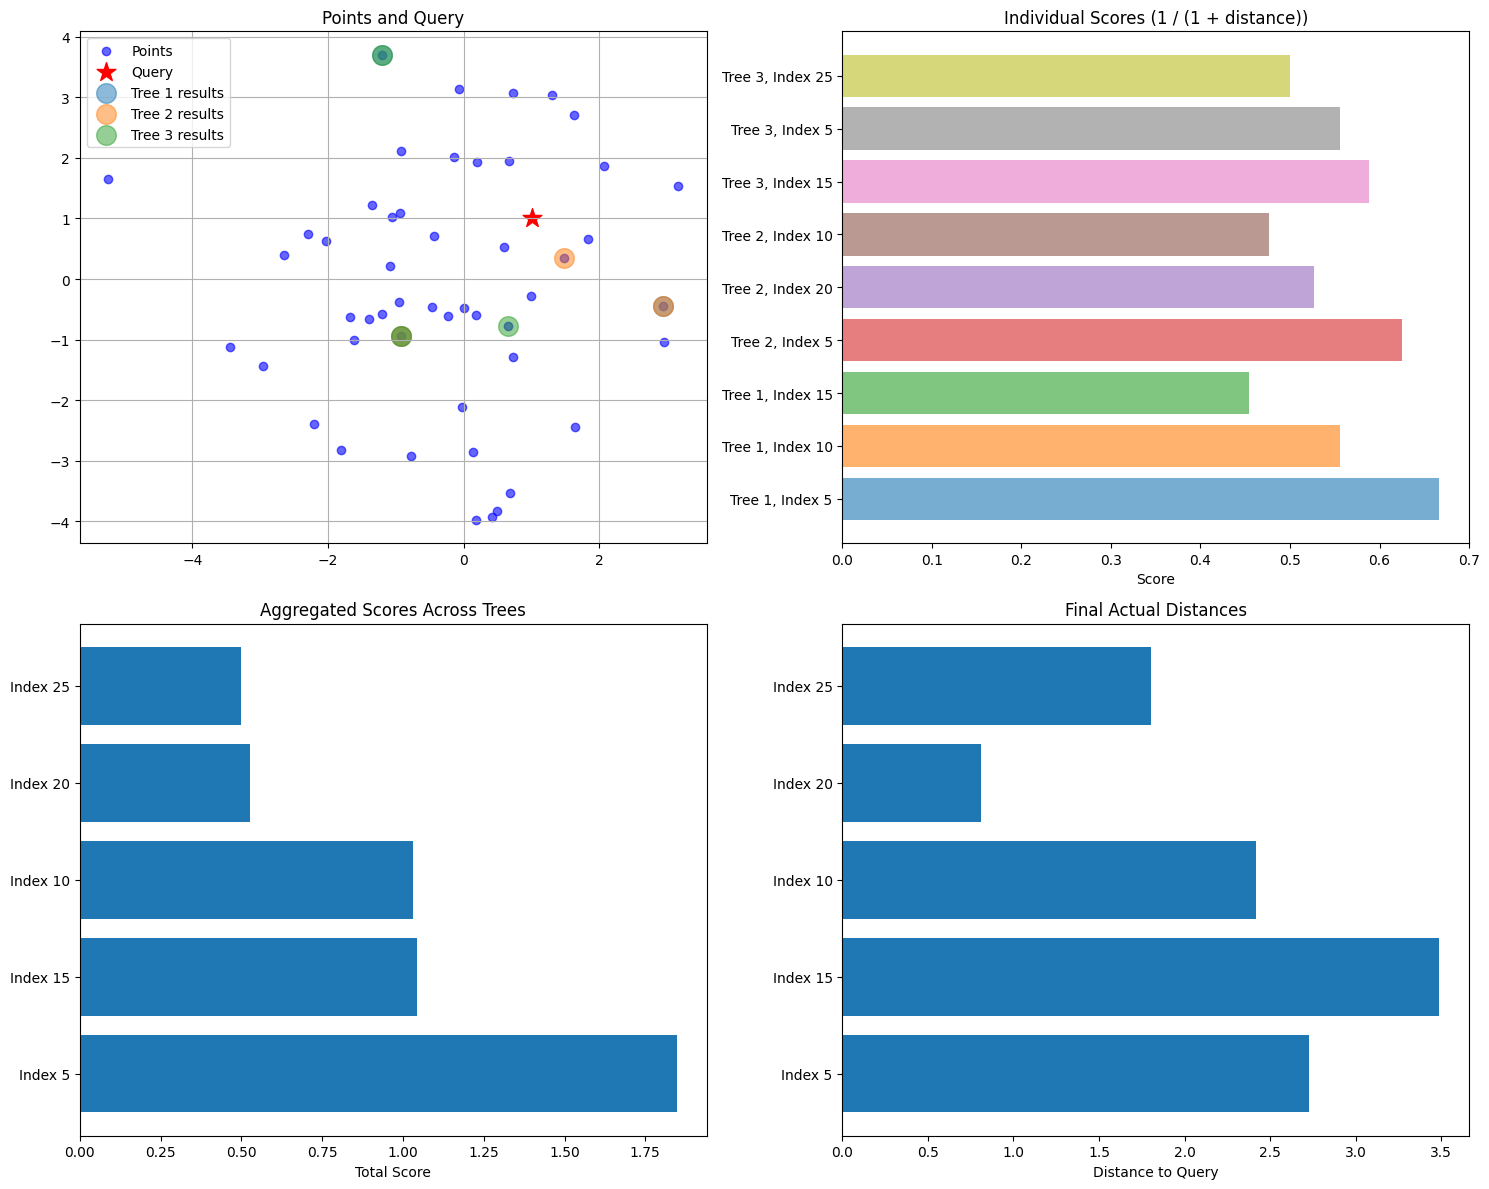

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def visualize_search_process():
    # Create sample data and query point
    np.random.seed(42)
    points = np.random.randn(50, 2) * 2
    query = np.array([1.0, 1.0])
    
    # Simulate results from 3 different trees
    tree1_results = [(5, 0.5), (10, 0.8), (15, 1.2)]  # (index, distance) from tree 1
    tree2_results = [(5, 0.6), (20, 0.9), (10, 1.1)]  # (index, distance) from tree 2
    tree3_results = [(15, 0.7), (5, 0.8), (25, 1.0)]  # (index, distance) from tree 3
    
    all_tree_results = [tree1_results, tree2_results, tree3_results]
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Original points and query
    ax = axes[0, 0]
    ax.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.6, label='Points')
    ax.scatter(query[0], query[1], c='red', s=200, marker='*', label='Query')
    
    # Highlight points found by different trees
    for i, tree_results in enumerate(all_tree_results):
        indices = [idx for idx, _ in tree_results]
        ax.scatter(points[indices, 0], points[indices, 1], 
                  alpha=0.5, s=200, label=f'Tree {i+1} results')
    
    ax.grid(True)
    ax.legend()
    ax.set_title('Points and Query')
    
    # Plot 2: Score calculation
    ax = axes[0, 1]
    
    # Calculate and plot scores
    candidates = defaultdict(float)
    y_positions = []
    labels = []
    
    for tree_idx, tree_results in enumerate(all_tree_results):
        for idx, dist in tree_results:
            score = 1.0 / (1.0 + dist)
            candidates[idx] += score
            y_positions.append(len(y_positions))
            labels.append(f'Tree {tree_idx+1}, Index {idx}')
            ax.barh(len(y_positions)-1, score, alpha=0.6, 
                   label=f'Dist: {dist:.2f}, Score: {score:.2f}')
    
    ax.set_yticks(range(len(y_positions)))
    ax.set_yticklabels(labels)
    ax.set_title('Individual Scores (1 / (1 + distance))')
    ax.set_xlabel('Score')
    
    # Plot 3: Aggregated scores
    ax = axes[1, 0]
    
    # Sort candidates by aggregated score
    sorted_candidates = sorted(candidates.items(), key=lambda x: x[1], reverse=True)
    
    y_pos = np.arange(len(sorted_candidates))
    indices = [idx for idx, _ in sorted_candidates]
    scores = [score for _, score in sorted_candidates]
    
    ax.barh(y_pos, scores)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f'Index {idx}' for idx in indices])
    ax.set_title('Aggregated Scores Across Trees')
    ax.set_xlabel('Total Score')
    
    # Plot 4: Final distances
    ax = axes[1, 1]
    
    # Calculate actual distances for top candidates
    distances = [np.linalg.norm(points[idx] - query) for idx, _ in sorted_candidates]
    
    ax.barh(y_pos, distances)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f'Index {idx}' for idx in indices])
    ax.set_title('Final Actual Distances')
    ax.set_xlabel('Distance to Query')
    
    plt.tight_layout()
    
visualize_search_process()

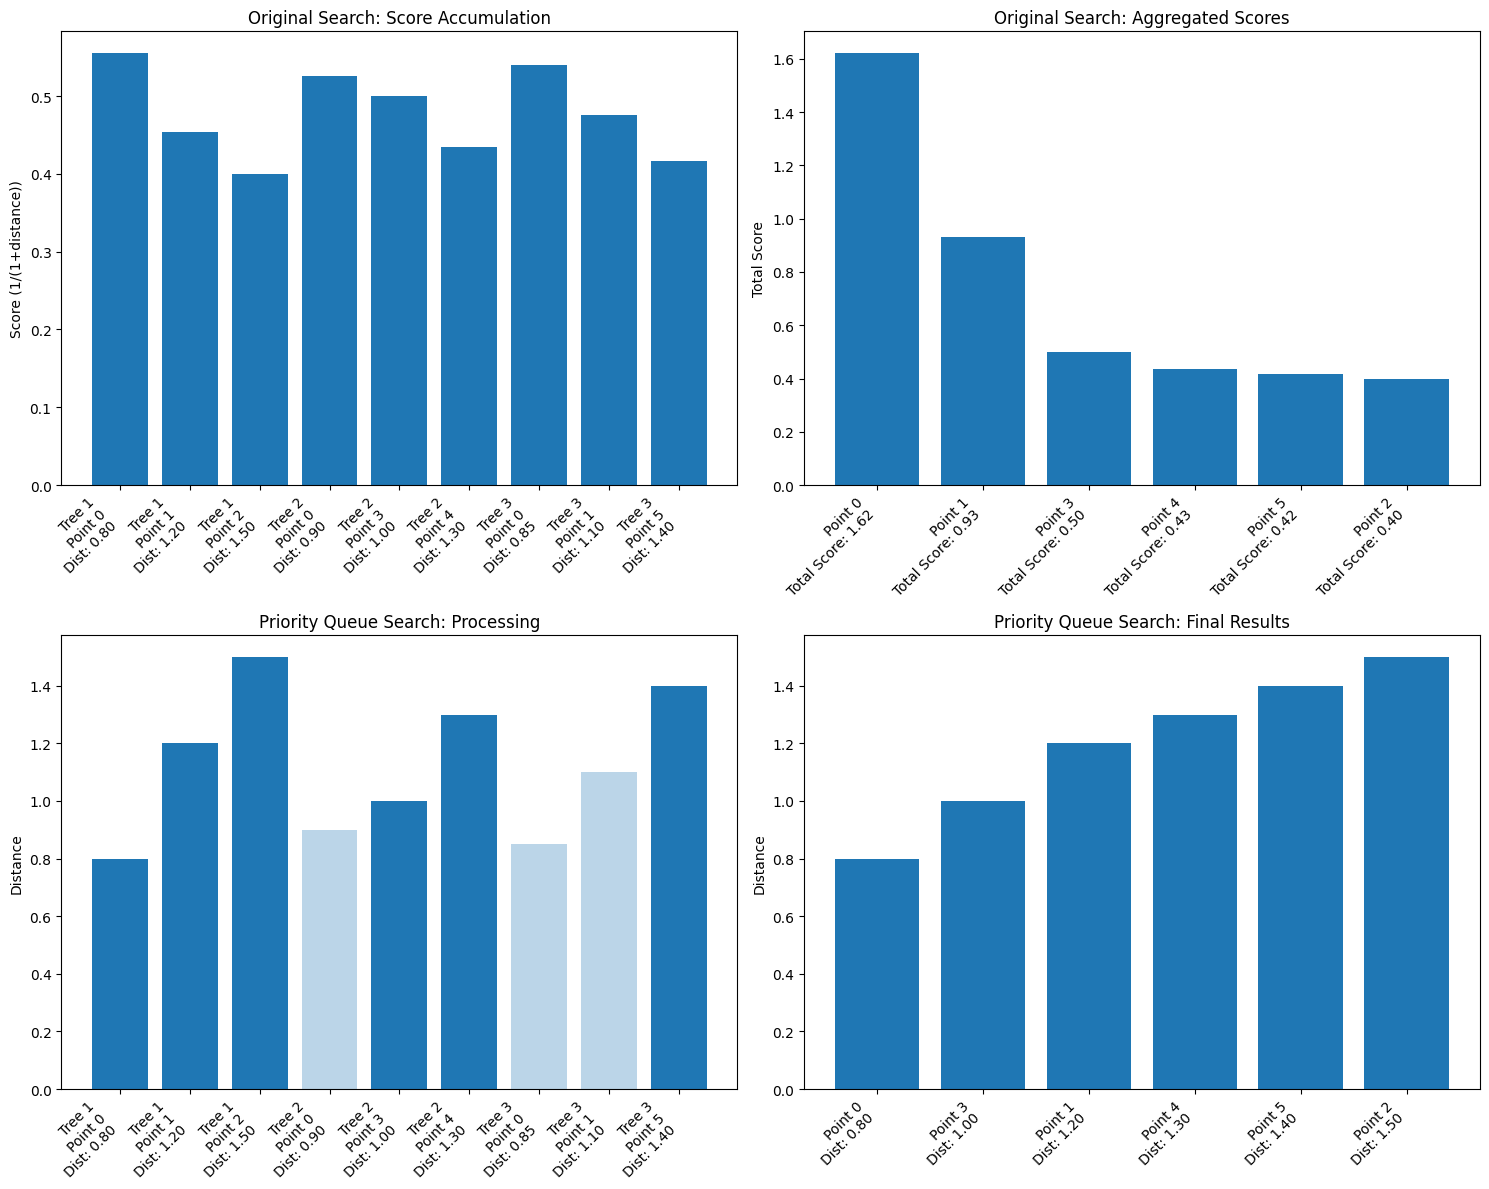

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq

def visualize_search_comparison():
    # Create sample data
    np.random.seed(42)
    points = np.random.randn(10, 2) * 2
    query = np.array([1.0, 1.0])
    
    # Simulate tree searches
    tree1_results = [(0, 0.8), (1, 1.2), (2, 1.5)]
    tree2_results = [(0, 0.9), (3, 1.0), (4, 1.3)]
    tree3_results = [(0, 0.85), (1, 1.1), (5, 1.4)]
    
    trees_results = [tree1_results, tree2_results, tree3_results]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Original Search - Score Accumulation
    ax = axes[0, 0]
    candidates = defaultdict(float)
    
    bar_positions = []
    bar_heights = []
    bar_labels = []
    
    for tree_idx, tree_results in enumerate(trees_results):
        for idx, dist in tree_results:
            score = 1.0 / (1.0 + dist)
            candidates[idx] += score
            bar_positions.append(len(bar_positions))
            bar_heights.append(score)
            bar_labels.append(f'Tree {tree_idx+1}\nPoint {idx}\nDist: {dist:.2f}')
    
    ax.bar(bar_positions, bar_heights)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, rotation=45, ha='right')
    ax.set_title('Original Search: Score Accumulation')
    ax.set_ylabel('Score (1/(1+distance))')
    
    # Plot 2: Original Search - Final Scores
    ax = axes[0, 1]
    sorted_candidates = sorted(candidates.items(), key=lambda x: x[1], reverse=True)
    
    positions = range(len(sorted_candidates))
    scores = [score for _, score in sorted_candidates]
    labels = [f'Point {idx}\nTotal Score: {score:.2f}' 
             for idx, score in sorted_candidates]
    
    ax.bar(positions, scores)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_title('Original Search: Aggregated Scores')
    ax.set_ylabel('Total Score')
    
    # Plot 3: Priority Queue Search - Processing
    ax = axes[1, 0]
    heap = []
    seen = set()
    
    bar_positions = []
    bar_heights = []
    bar_labels = []
    actions = []
    
    for tree_idx, tree_results in enumerate(trees_results):
        for idx, dist in tree_results:
            if idx not in seen:
                heapq.heappush(heap, (dist, idx))
                seen.add(idx)
                bar_positions.append(len(bar_positions))
                bar_heights.append(dist)
                bar_labels.append(f'Tree {tree_idx+1}\nPoint {idx}\nDist: {dist:.2f}')
                actions.append('Added')
            else:
                bar_positions.append(len(bar_positions))
                bar_heights.append(dist)
                bar_labels.append(f'Tree {tree_idx+1}\nPoint {idx}\nDist: {dist:.2f}')
                actions.append('Skipped')
    
    bars = ax.bar(bar_positions, bar_heights)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, rotation=45, ha='right')
    
    # Color bars based on action
    for bar, action in zip(bars, actions):
        if action == 'Skipped':
            bar.set_alpha(0.3)
    
    ax.set_title('Priority Queue Search: Processing')
    ax.set_ylabel('Distance')
    
    # Plot 4: Priority Queue Search - Final Results
    ax = axes[1, 1]
    final_heap = sorted(heap)
    
    positions = range(len(final_heap))
    distances = [dist for dist, _ in final_heap]
    labels = [f'Point {idx}\nDist: {dist:.2f}' 
             for dist, idx in final_heap]
    
    ax.bar(positions, distances)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_title('Priority Queue Search: Final Results')
    ax.set_ylabel('Distance')
    
    plt.tight_layout()

visualize_search_comparison()

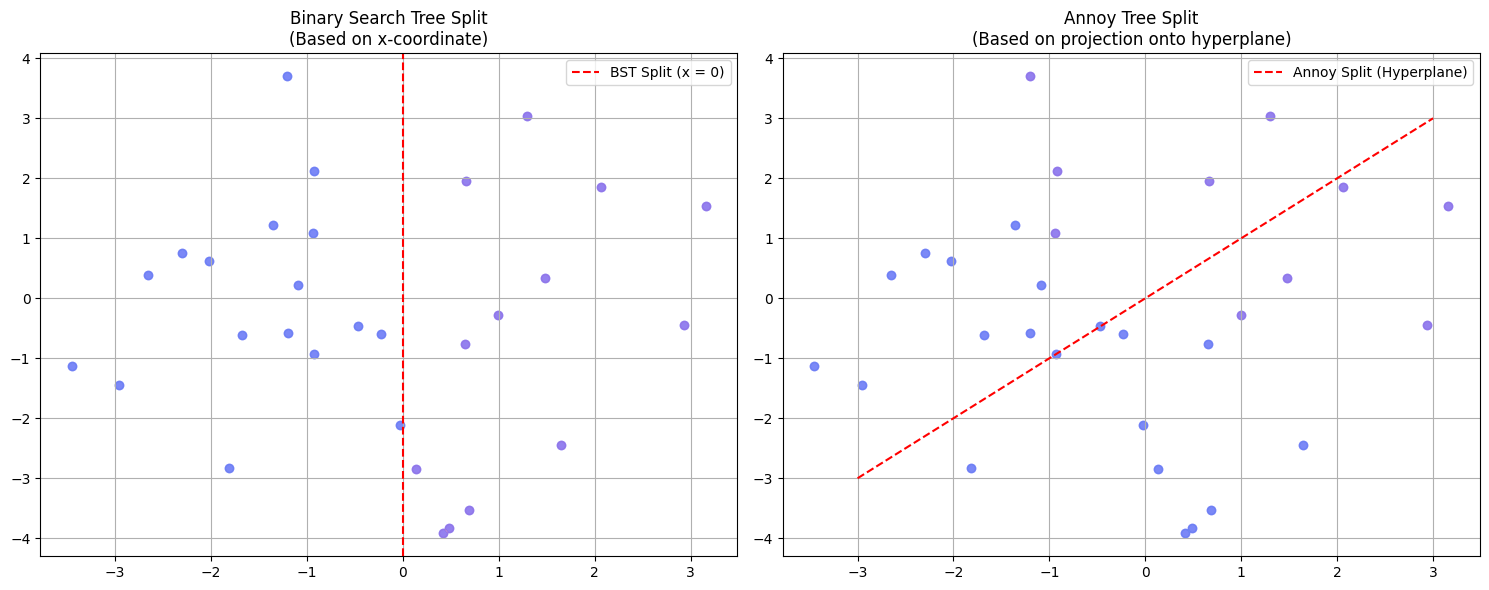

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_tree_comparison():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Generate sample points
    np.random.seed(42)
    points = np.random.randn(30, 2) * 2
    
    # Plot 1: Binary Search Tree splitting (vertical line)
    ax1.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.6)
    split_value = 0
    ax1.axvline(x=split_value, color='red', linestyle='--', 
                label='BST Split (x = 0)')
    
    # Color points based on BST split
    left_mask = points[:, 0] <= split_value
    ax1.scatter(points[left_mask, 0], points[left_mask, 1], 
                c='lightblue', alpha=0.3)
    ax1.scatter(points[~left_mask, 0], points[~left_mask, 1], 
                c='pink', alpha=0.3)
    
    ax1.grid(True)
    ax1.set_title('Binary Search Tree Split\n(Based on x-coordinate)')
    ax1.legend()
    
    # Plot 2: Annoy Tree splitting (angled hyperplane)
    ax2.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.6)
    
    # Create random hyperplane
    direction = np.array([1, 1]) / np.sqrt(2)  # 45-degree angle
    threshold = 0
    
    # Calculate and plot the splitting line
    line_points = np.array([[-3, -3], [3, 3]])
    ax2.plot(line_points[:, 0], line_points[:, 1], 'r--', 
             label='Annoy Split (Hyperplane)')
    
    # Color points based on hyperplane split
    projections = points @ direction
    left_mask = projections <= threshold
    ax2.scatter(points[left_mask, 0], points[left_mask, 1], 
                c='lightblue', alpha=0.3)
    ax2.scatter(points[~left_mask, 0], points[~left_mask, 1], 
                c='pink', alpha=0.3)
    
    ax2.grid(True)
    ax2.set_title('Annoy Tree Split\n(Based on projection onto hyperplane)')
    ax2.legend()
    
    plt.tight_layout()

visualize_tree_comparison()